<a href="https://colab.research.google.com/github/MuhammadAinurRiziq13/PCVK_2024_19/blob/main/Week11_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Nama  : Muhammad Ainur Riziq**
*   **Absen : 19**
*   **Kelas : TI - 3E**

https://github.com/MuhammadAinurRiziq13/PCVK_2024_19

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#### Implementasikan 6 metode template matching pada OpenCV dengan menggunakan  gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

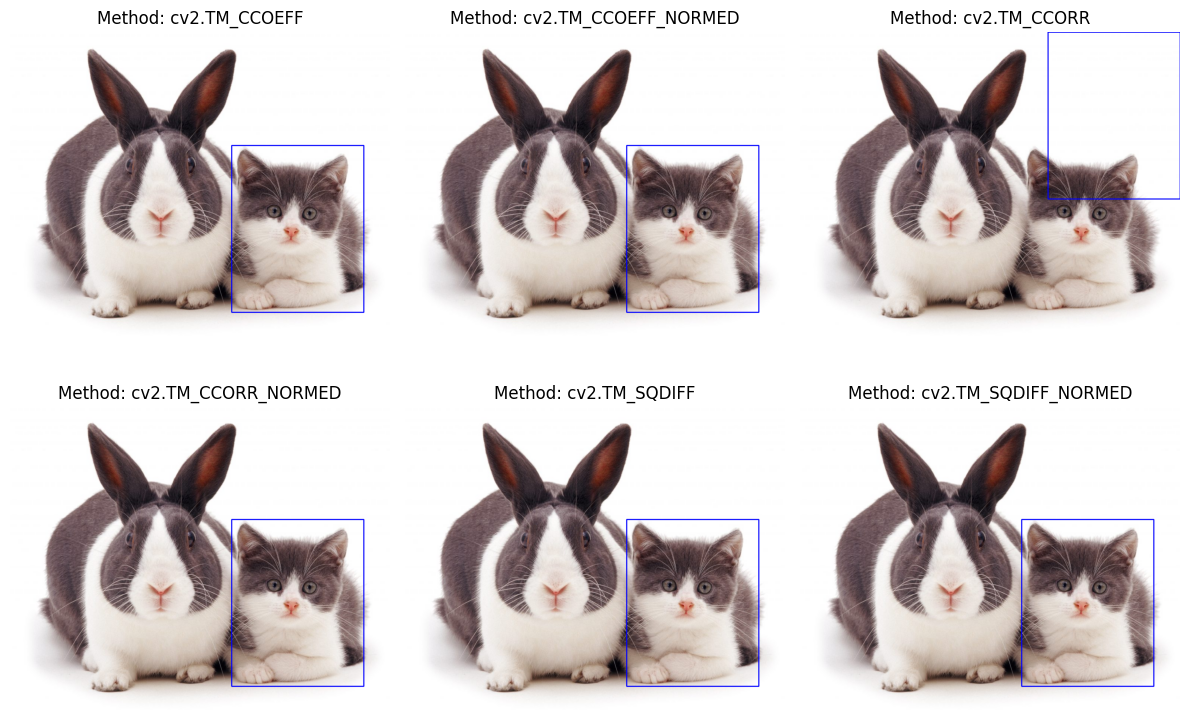

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar sumber dan template
image = cv2.imread('/content/drive/MyDrive/pcvk/Object Detection/cats_and_bunnies.jpg')
template = cv2.imread('/content/drive/MyDrive/pcvk/Object Detection/cat2_template.jpg', 0)  # Template dalam format grayscale

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

w, h = template.shape[::-1]

# Daftar metode template matching yang akan diterapkan
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Menyiapkan gambar untuk ditampilkan
plt.figure(figsize=(12, 8))

# Loop melalui setiap metode dan menerapkan template matching
for i, method_name in enumerate(methods):
    method = eval(method_name)

    # Melakukan template matching pada gambar grayscale
    result = cv2.matchTemplate(image_gray, template, method)

    # Menentukan lokasi hasil pencocokan
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Lokasi pencocokan terbaik
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Menentukan sudut kanan bawah dari kotak yang menggambarkan pencocokan
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Menampilkan kotak pencocokan pada gambar asli (BGR)
    image_copy = image.copy()  # Salin gambar asli
    cv2.rectangle(image_copy, top_left, bottom_right, (255, 0, 0), 2)  # Kotak merah

    # Mengubah gambar dari BGR ke RGB untuk plt
    image_copy_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

    # Menampilkan hasil
    plt.subplot(2, 3, i+1)
    plt.imshow(image_copy_rgb)
    plt.title(f'Method: {method_name}')
    plt.axis('off')

# Menampilkan hasil secara keseluruhan
plt.tight_layout()
plt.show()


####  Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object

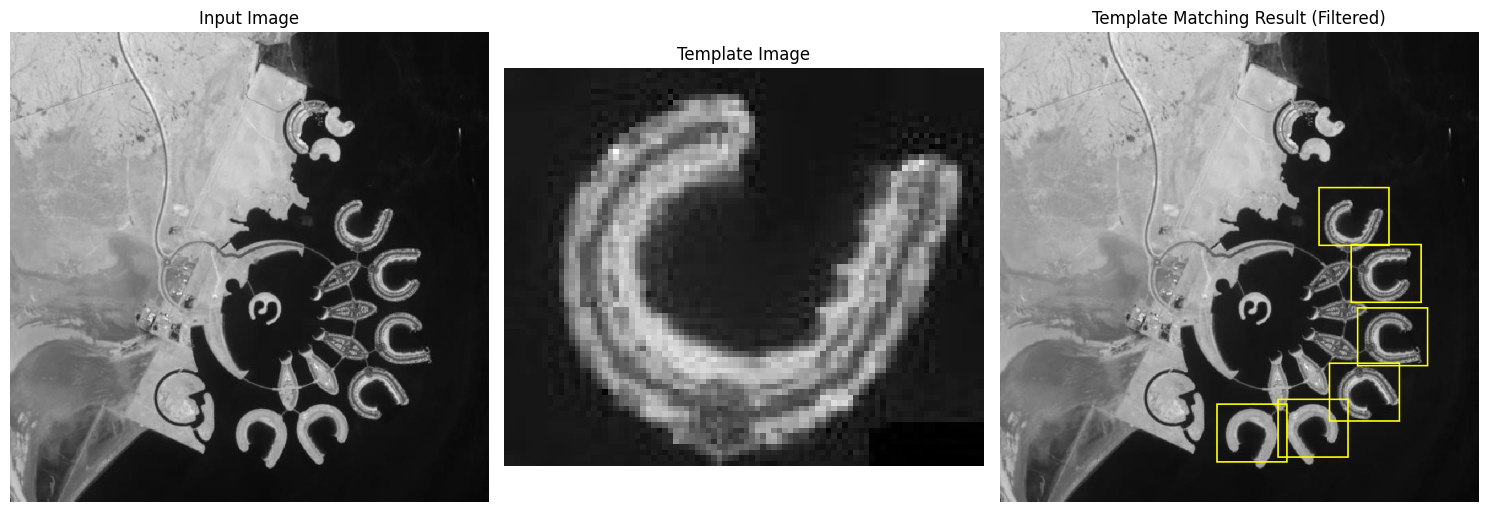

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Fungsi untuk membaca gambar dalam format grayscale
def read_image_as_grayscale(path):
    return Image.open(path).convert('L')

# Membaca gambar input dan template
input_image_path = '/content/drive/MyDrive/pcvk/Object Detection/bahrain.jpg'
template_image_path = '/content/drive/MyDrive/pcvk/Object Detection/bahrain-template.jpg'

input_image = read_image_as_grayscale(input_image_path)
template_image = read_image_as_grayscale(template_image_path)

# Konversi gambar ke array numpy
input_array = np.array(input_image, dtype=np.float32)
template_array = np.array(template_image, dtype=np.float32)

# Mendapatkan ukuran template
template_h, template_w = template_array.shape

# Implementasi fungsi matchTemplate dengan metode TM_CCOEFF_NORMED
def match_template(input_img, template):
    input_h, input_w = input_img.shape
    template_h, template_w = template.shape

    result_h = input_h - template_h + 1
    result_w = input_w - template_w + 1
    result = np.zeros((result_h, result_w), dtype=np.float32)

    template_mean = template.mean()
    template_std = template.std()

    for y in range(result_h):
        for x in range(result_w):
            roi = input_img[y:y + template_h, x:x + template_w]
            roi_mean = roi.mean()
            roi_std = roi.std()

            if roi_std == 0:  # Avoid division by zero
                result[y, x] = 0
            else:
                numerator = np.sum((roi - roi_mean) * (template - template_mean))
                denominator = template_std * roi_std * template_h * template_w
                result[y, x] = numerator / denominator

    return result

# Melakukan pencocokan template
res = match_template(input_array, template_array)

# Menentukan threshold untuk pencocokan
threshold = 0.43
loc = np.array(np.where(res >= threshold)).T  # Array of matching coordinates (y, x)

# Fungsi untuk menghindari duplikasi dalam area pencocokan
def remove_overlapping_boxes(boxes, template_w, template_h, overlap_threshold=0.5):
    filtered_boxes = []
    for box in boxes:
        is_duplicate = False
        for fbox in filtered_boxes:
            # Hitung jarak antara dua kotak
            distance = np.sqrt((box[0] - fbox[0])**2 + (box[1] - fbox[1])**2)
            if distance < max(template_w, template_h) * overlap_threshold:
                is_duplicate = True
                break
        if not is_duplicate:
            filtered_boxes.append(box)
    return filtered_boxes

# Filter lokasi untuk menghindari duplikasi
filtered_loc = remove_overlapping_boxes(loc, template_w, template_h)

# Menyalin gambar asli untuk menggambar hasil pencocokan
input_image_rgb = input_image.convert("RGB")
draw = ImageDraw.Draw(input_image_rgb)

for pt in filtered_loc:
    draw.rectangle([pt[1], pt[0], pt[1] + template_w, pt[0] + template_h], outline="yellow", width=2)

# Menampilkan hasil
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gambar asli
axs[0].imshow(input_image, cmap='gray')
axs[0].set_title('Input Image')
axs[0].axis('off')

# Template
axs[1].imshow(template_image, cmap='gray')
axs[1].set_title('Template Image')
axs[1].axis('off')

# Hasil pencocokan
axs[2].imshow(input_image_rgb)
axs[2].set_title('Template Matching Result (Filtered)')
axs[2].axis('off')

plt.tight_layout()
plt.show()

####  Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection

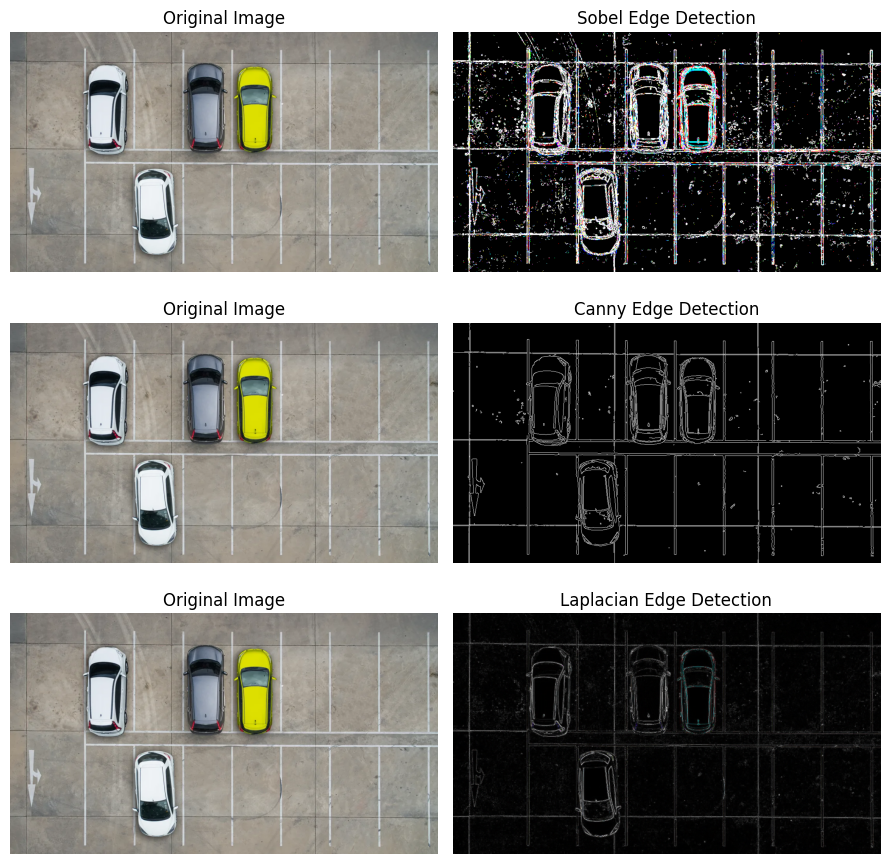

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = '/content/drive/MyDrive/pcvk/Object Detection/car-park.jpg'
image = cv2.imread(image_path)

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Derivative in x direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Derivative in y direction
sobel_edges = cv2.magnitude(sobel_x, sobel_y)  # Combine both directions
sobel_edges = np.uint8(sobel_edges)  # Convert to uint8

# Apply thresholding to reduce noise in Sobel edges
_, sobel_edges_thresholded = cv2.threshold(sobel_edges, 50, 255, cv2.THRESH_BINARY)

# Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)  # Thresholds can be adjusted

# Laplacian Edge Detection
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)
laplacian_edges = np.uint8(np.absolute(laplacian_edges))  # Convert to uint8

# Plot results
fig, axs = plt.subplots(3, 2, figsize=(9, 9))

# Sobel
axs[0, 0].imshow(image_rgb)
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(sobel_edges_thresholded, cmap='gray')
axs[0, 1].axis('off')
axs[0, 1].set_title('Sobel Edge Detection')

# Canny
axs[1, 0].imshow(image_rgb)
axs[1, 0].axis('off')
axs[1, 0].set_title('Original Image')

axs[1, 1].imshow(canny_edges, cmap='gray')
axs[1, 1].axis('off')
axs[1, 1].set_title('Canny Edge Detection')

# Laplacian
axs[2, 0].imshow(image_rgb)
axs[2, 0].axis('off')
axs[2, 0].set_title('Original Image')

axs[2, 1].imshow(laplacian_edges, cmap='gray')
axs[2, 1].axis('off')
axs[2, 1].set_title('Laplacian Edge Detection')

plt.tight_layout()
plt.show()

#### Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV

<ipython-input-10-85a6b0f4e450>:25: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  shi_tomasi_corners = np.int0(shi_tomasi_corners)


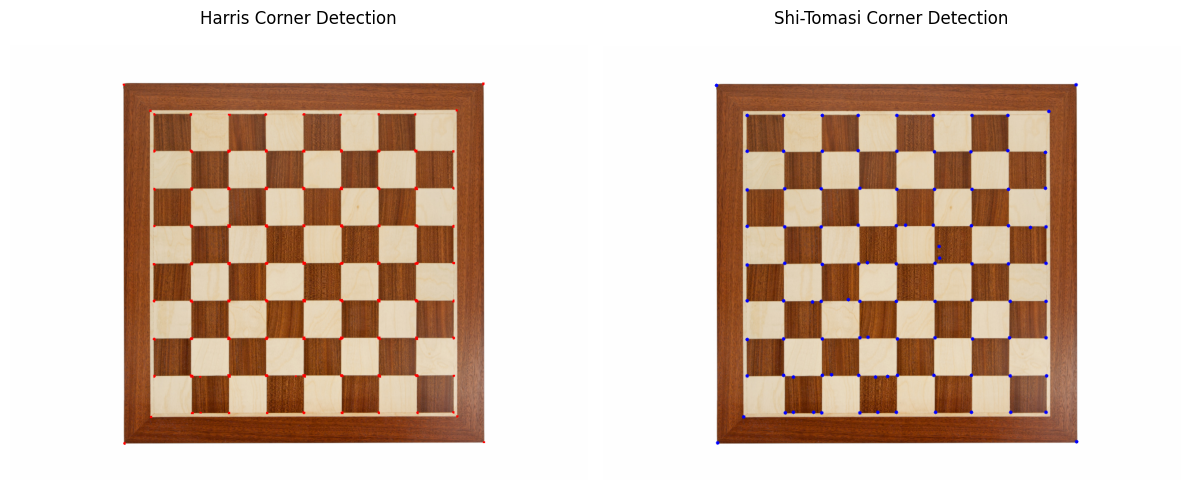

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke gambar
image_path = '/content/drive/MyDrive/pcvk/Object Detection/chess-board.jpg'

# Load gambar berwarna
image = cv2.imread(image_path)

# Mengubah gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
gray_float = np.float32(gray)
harris_corners = cv2.cornerHarris(gray_float, 2, 3, 0.04)

# Menandai sudut Harris
harris_corners = cv2.dilate(harris_corners, None)  # Memperbesar sudut untuk visibilitas
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # Tandai dengan warna merah

# Shi-Tomasi Corner Detection (Good Features to Track)
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
shi_tomasi_corners = np.int0(shi_tomasi_corners)

# Menandai sudut Shi-Tomasi
image_shi_tomasi = image.copy()
for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv2.circle(image_shi_tomasi, (x, y), 3, (255, 0, 0), -1)  # Tandai dengan warna hijau

# Konversi gambar ke format RGB untuk ditampilkan dengan Matplotlib
image_harris_rgb = cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB)
image_shi_tomasi_rgb = cv2.cvtColor(image_shi_tomasi, cv2.COLOR_BGR2RGB)

# Plot hasil deteksi sudut
plt.figure(figsize=(12, 8))

# Harris Corner Detection
plt.subplot(1, 2, 1)
plt.imshow(image_harris_rgb)
plt.title('Harris Corner Detection')
plt.axis('off')

# Shi-Tomasi Corner Detection
plt.subplot(1, 2, 2)
plt.imshow(image_shi_tomasi_rgb)
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Implementasikan metode Hough Transform pada OpenCV

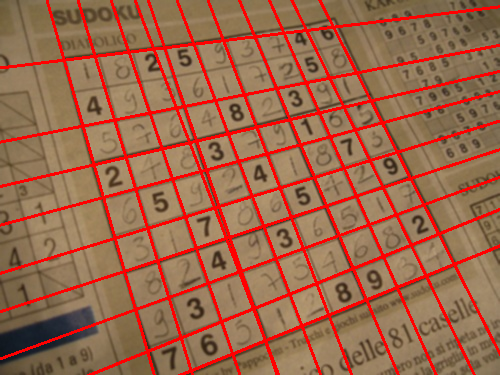

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def is_similar(line1, line2, rho_thresh, theta_thresh):
    """
    Fungsi untuk memeriksa apakah dua garis serupa berdasarkan nilai rho dan theta.
    """
    rho1, theta1 = line1
    rho2, theta2 = line2
    return abs(rho1 - rho2) < rho_thresh and abs(theta1 - theta2) < theta_thresh

# Membaca gambar Sudoku
img = cv2.imread('/content/drive/MyDrive/pcvk/Object Detection/sudoku.jpg')
# Mengonversi gambar ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menerapkan Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Mendeteksi tepi menggunakan Canny
edges = cv2.Canny(blurred, 50, 200)

# Menerapkan Hough Transform untuk mendeteksi garis
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

# Menyaring garis duplikat
filtered_lines = []
rho_threshold = 10  # Ambang batas jarak (rho)
theta_threshold = np.pi / 180 * 10  # Ambang batas sudut (theta)

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        # Periksa apakah garis serupa sudah ada di daftar
        if all(not is_similar((rho, theta), (r, t), rho_threshold, theta_threshold) for r, t in filtered_lines):
            filtered_lines.append((rho, theta))

    # Menggambar garis yang telah difilter pada gambar asli
    for rho, theta in filtered_lines:
        # Menghitung titik garis berdasarkan rho dan theta
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Menggambar garis
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Menampilkan gambar hasil dengan garis
cv2_imshow(img)

#### Implementasikan fungsi findContours() pada OpenCV untuk contour detection

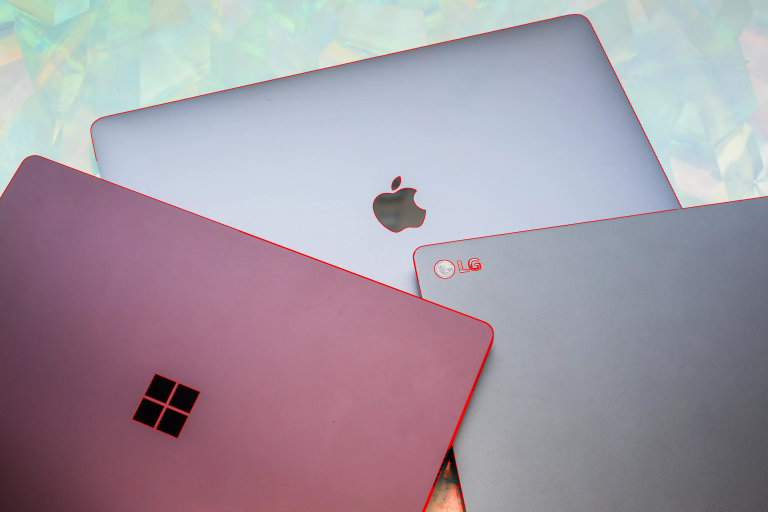

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/pcvk/Object Detection/laptop.jpg')

# Mengonversi gambar ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menerapkan Gaussian Blur untuk mengurangi noise sebelum deteksi tepi
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Tahap 1: Mengubah citra input menjadi citra biner menggunakan deteksi tepi Canny
edges = cv2.Canny(blurred, 50, 150)  # Parameter bisa disesuaikan untuk meningkatkan akurasi

# Tahap 2: Menemukan kontur menggunakan fungsi findContours()
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menyalin gambar asli untuk menggambar kontur
contour_img = img.copy()

# Tahap 3: Menggambarkan kontur pada citra input menggunakan fungsi drawContours()
cv2.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Warna merah untuk kontur

contour_img_resized = cv2.resize(contour_img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_AREA)

# Menampilkan gambar hasil dengan kontur
cv2_imshow(contour_img_resized)

####  Pengayaan Materi KTP

Threshold Value: 180.0, Binary Image Shape: (300, 493)


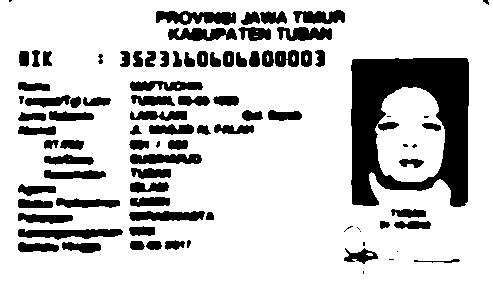

Gambar setelah erosi:


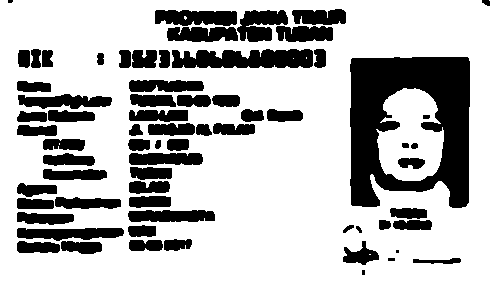

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Lokasi file gambar
path_plate = "/content/drive/MyDrive/pcvk/Object Detection/KTP_More/ktp3.png"

# Membaca gambar
src = cv2.imread(path_plate)

if src is not None:
    # Membuat salinan untuk proses
    blurred = src.copy()

    # Filtering menggunakan Gaussian Blur
    for i in range(10):  # Ulangi 10 kali
        blurred = cv2.GaussianBlur(blurred, (5, 5), 0.5)

    # Ubah ke grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

    # Thresholding menggunakan metode Otsu
    ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Menampilkan gambar biner yang dihasilkan
    print(f"Threshold Value: {ret}, Binary Image Shape: {bw.shape}")
    cv2_imshow(bw)

    # Terapkan operasi morfologi erode
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Elemen struktur berbentuk persegi 3x3
    eroded = cv2.erode(bw.copy(), kernel, iterations=1)

    # Menampilkan hasil erosi
    print("Gambar setelah erosi:")
    cv2_imshow(eroded)
else:
    print("Gambar tidak ditemukan.")


#### Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.

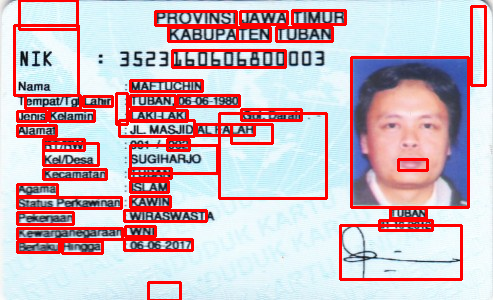

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Path gambar
image_path = "/content/drive/MyDrive/pcvk/Object Detection/KTP_More/ktp3.png"

# Membaca gambar
src = cv2.imread(image_path)

# Mengubah gambar ke grayscale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Menggunakan adaptive thresholding untuk mendeteksi lebih banyak detail
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 8
)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(thresh, 50, 150)

# Menggabungkan threshold dan edges untuk hasil optimal
combined = cv2.bitwise_or(thresh, edges)

# Memperhalus dengan dilasi dan erosi
kernel = np.ones((3, 3), np.uint8)
processed = cv2.dilate(combined, kernel, iterations=1)
processed = cv2.erode(processed, kernel, iterations=1)

# Ekstraksi kontur
contours, _ = cv2.findContours(processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Looping untuk setiap kontur
for cnt in contours:
    # Mendapatkan bounding box dari kontur
    x, y, w, h = cv2.boundingRect(cnt)
    area = cv2.contourArea(cnt)

    # Menyaring kontur berdasarkan area minimum
    if area > 150:  # Sesuaikan area minimum jika perlu
        # Menggambar kotak di sekitar kontur
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), 2)
        # Menampilkan informasi bounding box
        # print(f"+ x={x}, y={y}, w={w}, h={h}, area={area}")

# Menampilkan gambar hasil
cv2_imshow(src)

#### F. Tugas Praktikum

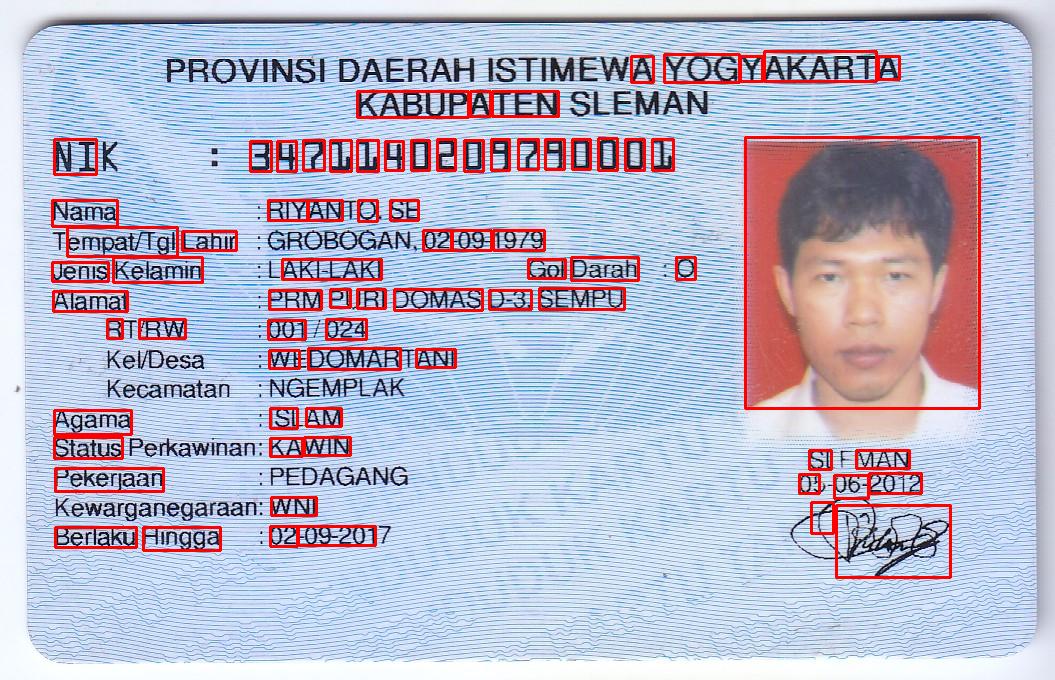

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Path gambar
image_path = "/content/drive/MyDrive/pcvk/Object Detection/KTP_More/ktp.png"

# Membaca gambar
src = cv2.imread(image_path)

# Membuat salinan gambar untuk digambar
draw = src.copy()

# Mengubah gambar ke grayscale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Peningkatan kontras menggunakan CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = clahe.apply(gray)

# Menggunakan Gaussian blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Menggunakan thresholding Otsu untuk mendapatkan ambang batas yang optimal
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Operasi morfologi untuk membersihkan noise
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Deteksi kontur
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menyaring dan menggambar kontur
for cnt in contours:
    # Mendapatkan area kontur
    area = cv2.contourArea(cnt)

    # Filter kontur berdasarkan area dan aspek rasio
    if area > 100:  # Sesuaikan area minimum sesuai kebutuhan
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h)

        # Filter tambahan berdasarkan aspek rasio
        if 0.5 < aspect_ratio < 5:
            # Menggambar kotak di sekitar kontur
            cv2.rectangle(draw, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Menampilkan informasi kontur
            # print(f"Kontur ditemukan - Area: {area}, Aspect Ratio: {aspect_ratio:.2f}")

# Menampilkan gambar hasil
cv2_imshow(draw)